In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
ls /mnt/SCA1/CARDIS/script/graph_ge2/numeric/avr/zaid/transfer_channel/EM2/

EM2.npy*  EM3+EM2.npy*  EM3.npy*  EM4+EM2.npy*  EM4.npy*


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# path with arguments 0: family / 1: archi / 2: scenario / 3: target
#path_format = 'numeric/{0:}/{1:}/transfer_{2:}/{3:}'

#path_format = './graph_ge2/numeric/{0:}/{1:}/transfer_{2:}/{3:}'
path_format = '/mnt/SCA1/CARDIS/script/graph_ge2/numeric/{0:}/{1:}/transfer_{2:}/{3:}/'

archis = {
    'ascad': '--',
    'noConv1': '-.',
    'zaid': ':'
}

# Cross-Channel

In [26]:
family = 'avr'
scenario = 'channel'
devices = {
    'EM2': 'blue',
    'EM3': 'red',
    'EM4': 'green'
}

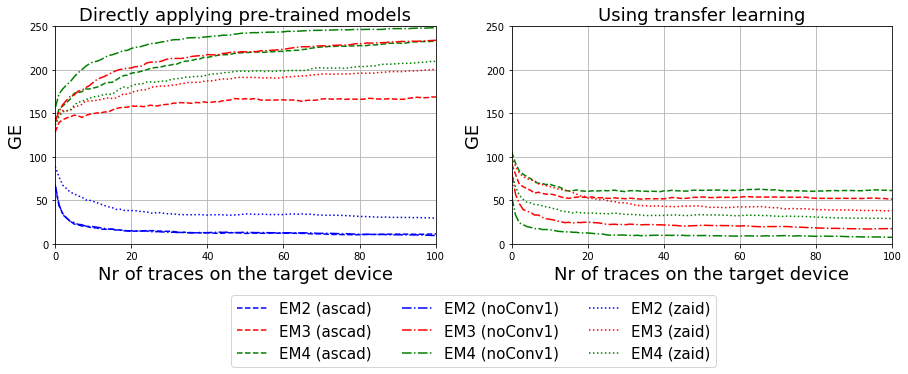

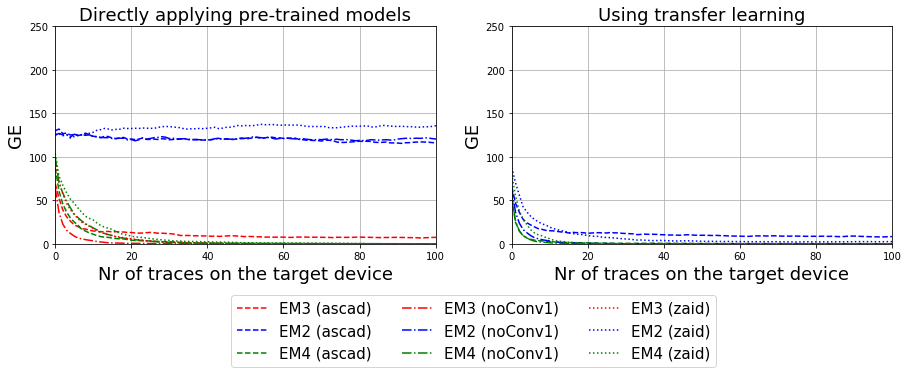

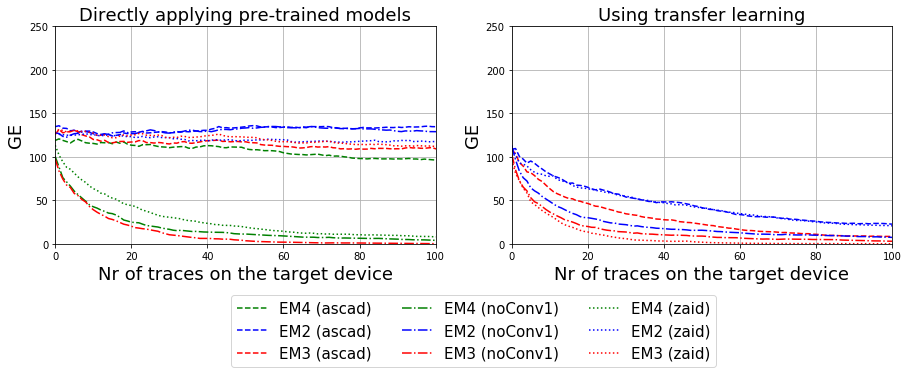

In [34]:
for target in ('EM2','EM3','EM4',):
    fig, axes = plt.subplots(1,2)
    #plt.suptitle('Targeting {}'.format(target), fontsize=20, y=1.1)
    fig.set_figheight(4)
    fig.set_figwidth(15)
    axes[0].set_xlabel('Nr of traces on the target device', fontsize=18)
    axes[0].set_ylabel('GE', fontsize=18)
    axes[0].set_title('Directly applying pre-trained models', fontsize=18)
    axes[0].set_xlim(0,100)
    axes[0].set_ylim(0,250)
    axes[1].set_xlabel('Nr of traces on the target device', fontsize=18)
    axes[1].set_ylabel('GE', fontsize=18)
    axes[1].set_title('Using transfer learning', fontsize=18)
    axes[1].set_xlim(0,100)
    axes[1].set_ylim(0,250)
    axes[0].grid()
    axes[1].grid()
    for archi , line_style in archis.items():
        path = path_format.format(family,archi,scenario,target)
        files = os.listdir(path)
        for file in files:
            pre_device = file[0:3]
            label = '{} ({})'.format(pre_device,archi)
            ge = np.load(os.path.join(path,file))
            plot_axis = 0
            if '+' in file:
                plot_axis =  1
            axes[plot_axis].plot(ge,label=label,ls=line_style,color=devices[pre_device])
    axes[0].legend(loc='upper center',bbox_to_anchor=(1.1, -0.2),ncol=3, prop={"size":15})
    plt.show()

        

# Cross-Device

In [36]:
family = 'stm32'
scenario = 'device'
devices = {
    'F0': 'blue',
    'F1': 'orange',
    'F2': 'green',
    'F4': 'red'
}

## First plot all results to see convergence

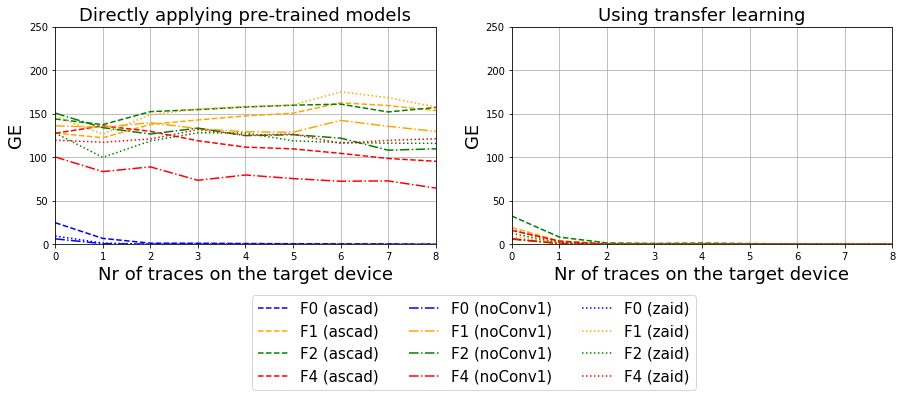

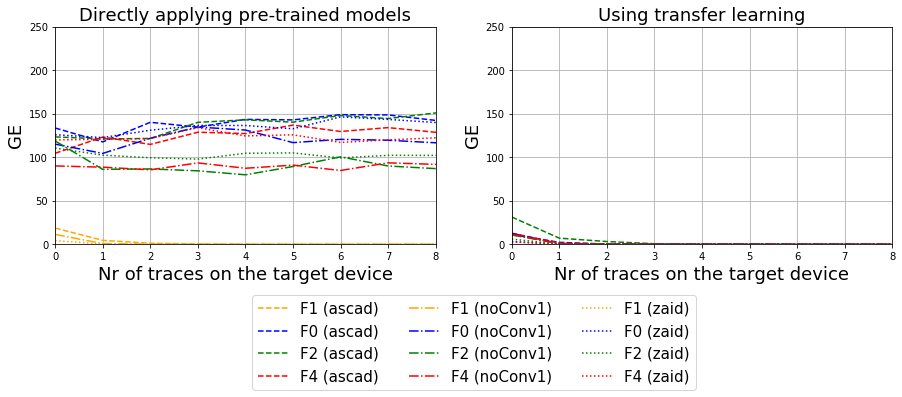

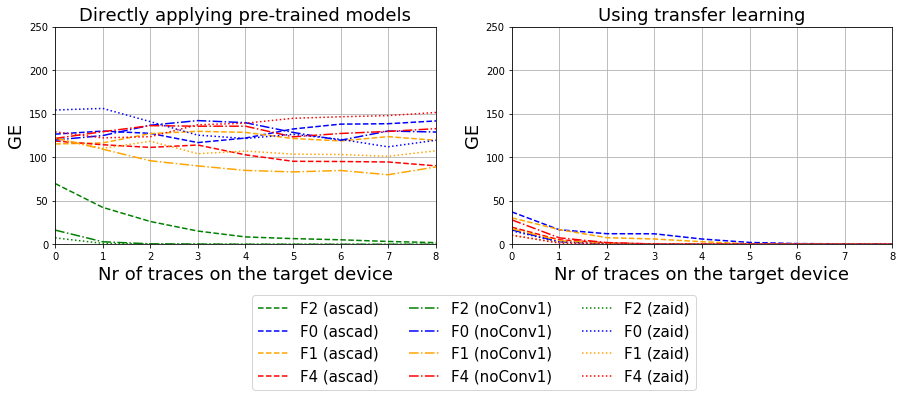

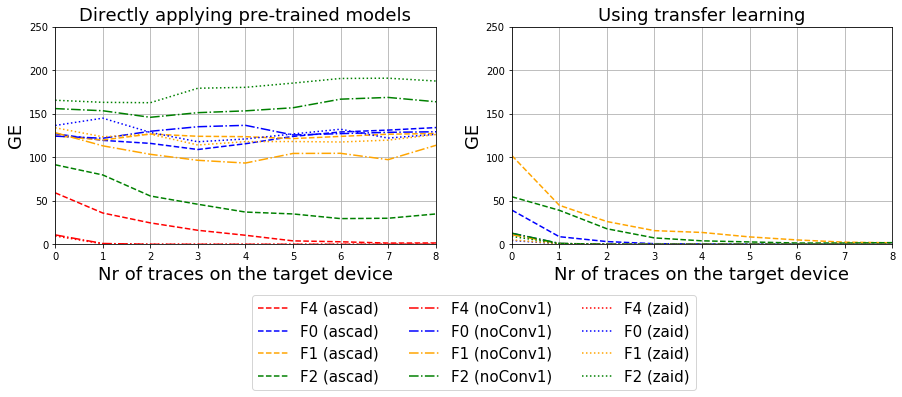

In [37]:
for target in ('08BF0PW','08BF1PW','08BF2PW','08BF4PW',):
    fig, axes = plt.subplots(1,2)
    #plt.suptitle('Targeting {}'.format(target[3:]), fontsize=20, y=1.1)
    fig.set_figheight(4)
    fig.set_figwidth(15)
    axes[0].set_xlabel('Nr of traces on the target device', fontsize=18)
    axes[0].set_ylabel('GE', fontsize=18)
    axes[0].set_title('Directly applying pre-trained models', fontsize=18)
    axes[0].set_xlim(0,8)
    axes[0].set_ylim(0,250)
    axes[1].set_xlabel('Nr of traces on the target device', fontsize=18)
    axes[1].set_ylabel('GE', fontsize=18)
    axes[1].set_title('Using transfer learning', fontsize=18)
    axes[1].set_xlim(0,8)
    axes[1].set_ylim(0,250)
    axes[0].grid()
    axes[1].grid()
    for archi , line_style in archis.items():
        path = path_format.format(family,archi,scenario,target)
        files = os.listdir(path)
        for file in files:
            pre_device = file[3:5]
            label = '{} ({})'.format(pre_device,archi)
            ge = np.load(os.path.join(path,file))
            plot_axis = 0
            if '+' in file:
                plot_axis =  1
            axes[plot_axis].plot(ge,label=label,ls=line_style,color=devices[pre_device])
    axes[0].legend(loc='upper center',bbox_to_anchor=(1.1, -0.2),ncol=3, prop={"size":15})
    plt.show()

        

# Cross-Side

In [38]:
family = 'stm32'
scenario = 'side'
devices = {
    'F0': 'blue',
    'F1': 'orange',
    'F2': 'green',
    'F4': 'red'
}

chan = {
    'PW': 'red',
    'EM': 'blue'
}

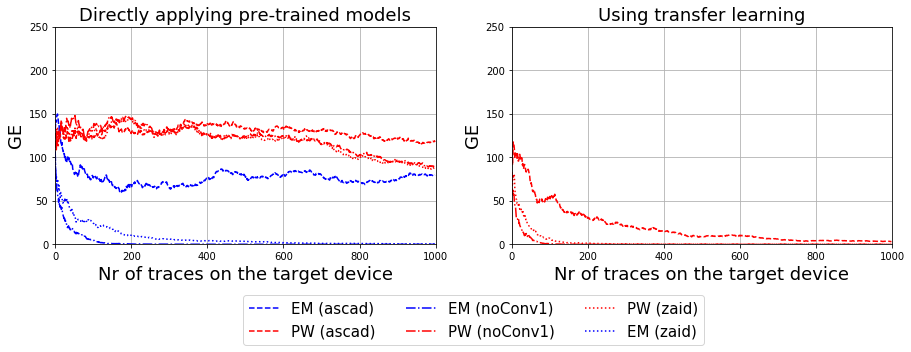

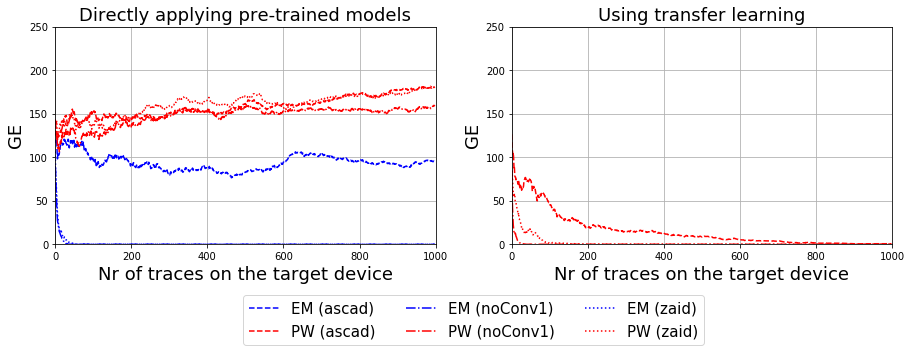

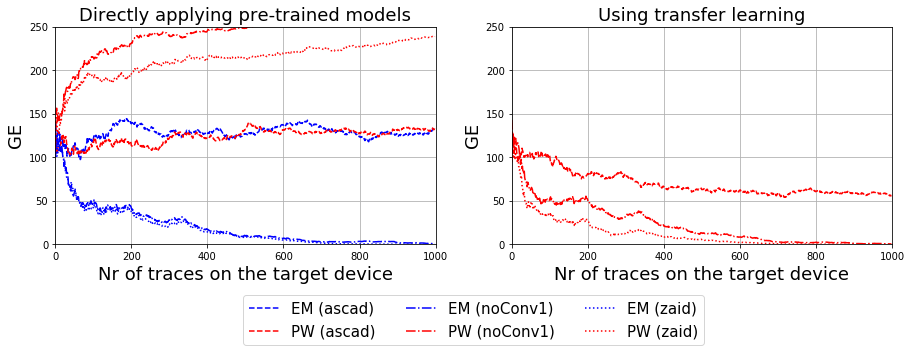

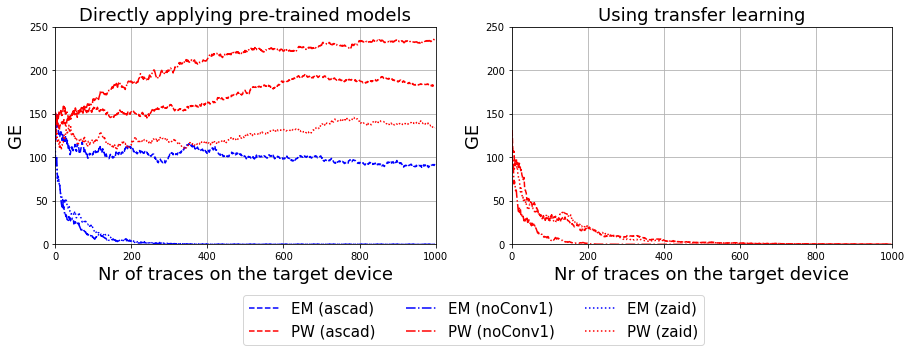

In [40]:
for target in ('08BF0EM','08BF1EM','08BF2EM','08BF4EM',):
    fig, axes = plt.subplots(1,2)
    #plt.suptitle('Targeting {}'.format(target[3:]), fontsize=20, y=1.1)
    fig.set_figheight(4)
    fig.set_figwidth(15)
    axes[0].set_xlabel('Nr of traces on the target device', fontsize=18)
    axes[0].set_ylabel('GE', fontsize=18)
    axes[0].set_title('Directly applying pre-trained models', fontsize=18)
    axes[0].set_xlim(0,1000)
    axes[0].set_ylim(0,250)
    axes[1].set_xlabel('Nr of traces on the target device', fontsize=18)
    axes[1].set_ylabel('GE', fontsize=18)
    axes[1].set_title('Using transfer learning', fontsize=18)
    axes[1].set_xlim(0,1000)
    axes[1].set_ylim(0,250)
    axes[0].grid()
    axes[1].grid()
    for archi , line_style in archis.items():
        path = path_format.format(family,archi,scenario,target)
        files = os.listdir(path)
        for file in files:
            pre_device = file[3:5]
            chan_device = file[5:7]
            
            #label = '{} ({})'.format(pre_device,archi)
            label = '{} ({})'.format(chan_device,archi)
            ge = np.load(os.path.join(path,file))
            plot_axis = 0
            if '+' in file:
                plot_axis =  1
            #axes[plot_axis].plot(ge,label=label,ls=line_style,color=devices[pre_device])
            axes[plot_axis].plot(ge,label=label,ls=line_style,color=chan[chan_device])
    axes[0].legend(loc='upper center',bbox_to_anchor=(1.1, -0.2),ncol=3, prop={"size":15})
    plt.show()

        